<a href="https://colab.research.google.com/github/Hassanmoin3/Segmentation-and-counting-of-teeths-using-panoramic-dental-X-rays/blob/main/Script/256x256_Transformer_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading and Preparing Images and Masks**



In [ ]:
import cv2
import os
from google.colab import drive
path_to_images = "/content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/"
path_to_masks = "/content/drive/MyDrive/dissertation/Data/Original_Masks1/Masks/Orig_Masks/"


In [ ]:
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
resized_images = []
resized_masks = []

for img, mask in zip(images, masks):
    resized_images.append(cv2.resize(img, (256, 256)))
    resized_masks.append(cv2.resize(mask, (256, 256)))


# **Training Transformer Based Unet Model**

In [ ]:
import torch
from torch.utils.data import DataLoader
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.utils import metrics
import cv2
import os
import numpy as np
from albumentations import (
    Compose,
    Resize,
    Normalize,
)

model = smp.Unet(
    encoder_name="efficientnet-b0",
    encoder_weights=None,
    in_channels=1,
    classes=1,
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.load_state_dict(torch.load("/content/drive/MyDrive/dissertation/modelss/model_transformer.pth"))
model.to(device)

model.eval()

accuracy_metric = metrics.Accuracy()
f1_score_metric = metrics.Fscore()
precision_metric = metrics.Precision()
recall_metric = metrics.Recall()

transform = Compose([
    Resize(256, 256),
    Normalize(mean=(0.485,), std=(0.229,))
])

test_images, test_masks = data_loader(path_to_images, path_to_masks, transform)

test_images_np = np.array(test_images)
test_masks_np = np.array(test_masks)

batch_size = 10
test_images_loader = DataLoader(test_images_np, batch_size=batch_size)
test_masks_loader = DataLoader(test_masks_np, batch_size=batch_size)

with torch.no_grad():
    total_accuracy = 0
    total_f1 = 0
    total_precision = 0
    total_recall = 0

    for images_batch, masks_batch in zip(test_images_loader, test_masks_loader):
        images_tensor = images_batch.clone().detach().unsqueeze(1).float().to(device)
        masks_tensor = masks_batch.clone().detach().unsqueeze(1).float().to(device)

        outputs = model(images_tensor)

        pred_mask = (outputs > 0.5).float()

        accuracy = accuracy_metric(pred_mask, masks_tensor).detach().cpu().numpy()
        f1_score = f1_score_metric(pred_mask, masks_tensor).detach().cpu().numpy()
        precision = precision_metric(pred_mask, masks_tensor).detach().cpu().numpy()
        recall = recall_metric(pred_mask, masks_tensor).detach().cpu().numpy()

        total_accuracy += accuracy
        total_f1 += f1_score
        total_precision += precision
        total_recall += recall

    total_accuracy /= len(test_images_loader)
    total_f1 /= len(test_images_loader)
    total_precision /= len(test_images_loader)
    total_recall /= len(test_images_loader)

    print(f"Test Accuracy: {total_accuracy}")
    print(f"Test F1 Score: {total_f1}")
    print(f"Test Precision: {total_precision}")
    print(f"Test Recall: {total_recall}")


Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/100.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/100.jpg
Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/1001.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/1001.jpg
Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/472.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/472.jpg
Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/1000.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/1000.jpg
Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/1.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/1.jpg
Loading image from /content/drive/MyDriv

# **Testing Transfomer Based Unet Model**

Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/100.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/100.jpg
Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/1001.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/1001.jpg
Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/472.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/472.jpg
Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/1000.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/1000.jpg
Loading image from /content/drive/MyDrive/dissertation/Data/DentalPanoramicXrays/Images1/1.JPG
Loading mask from /content/drive/MyDrive/dissertation/Original_Masks1/Masks/Orig_Masks/1.jpg
Loading image from /content/drive/MyDriv

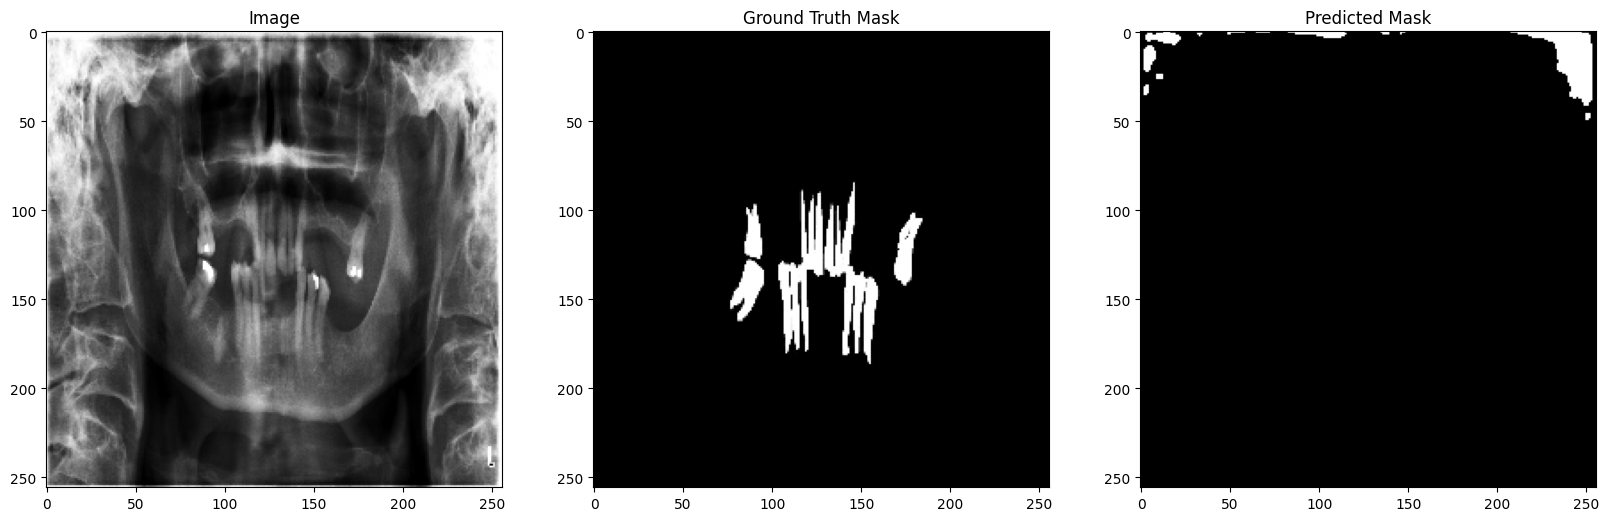

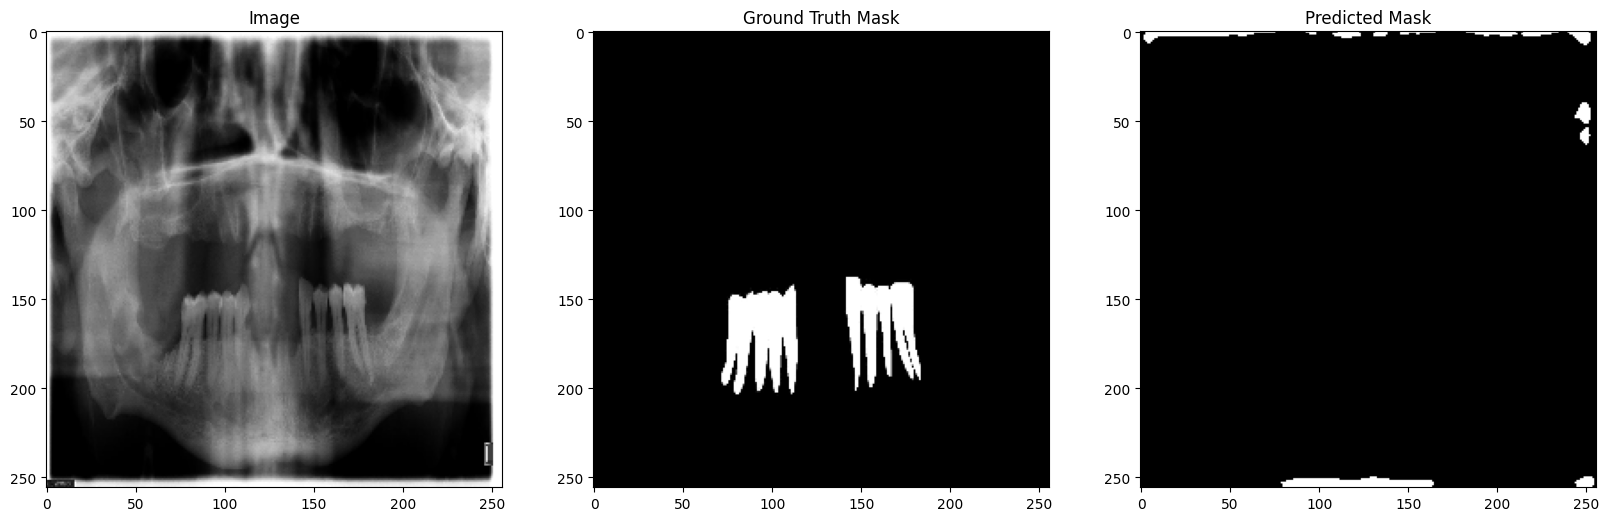

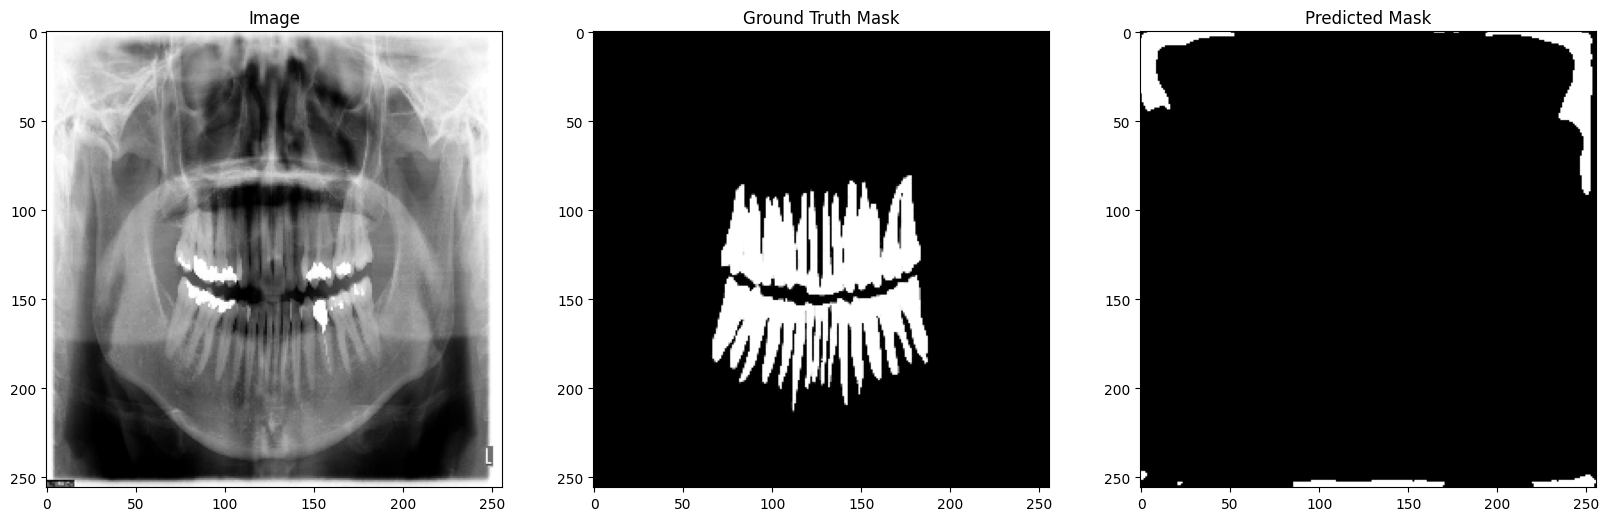

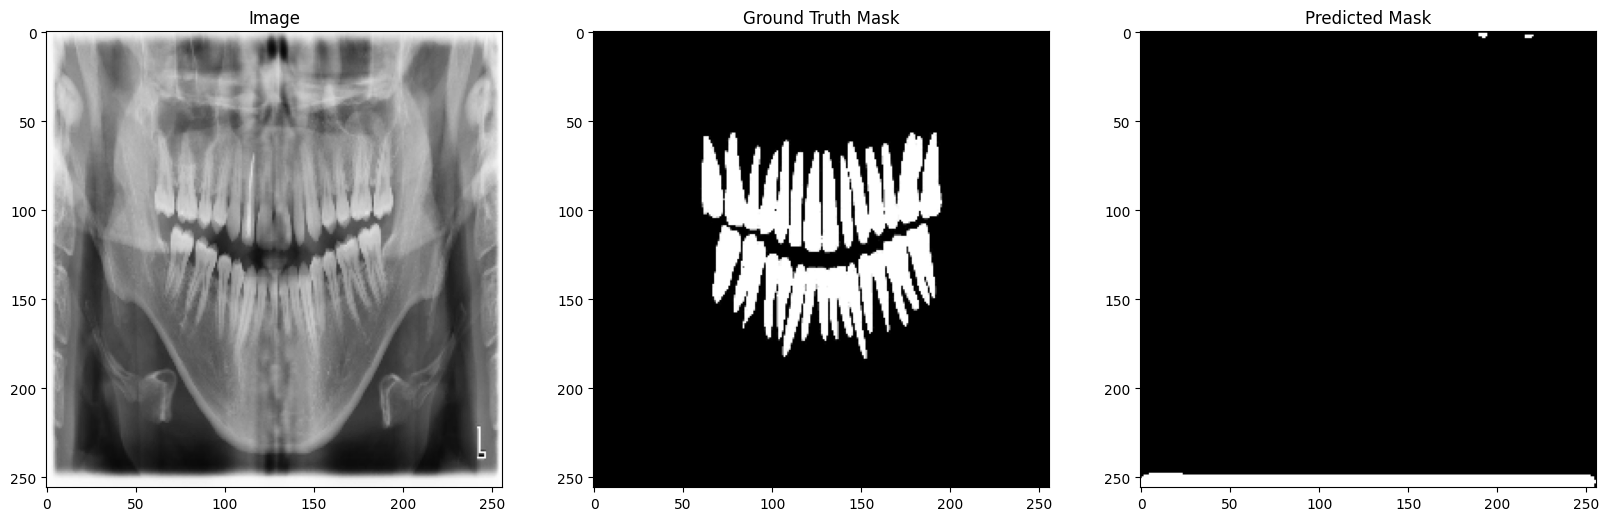

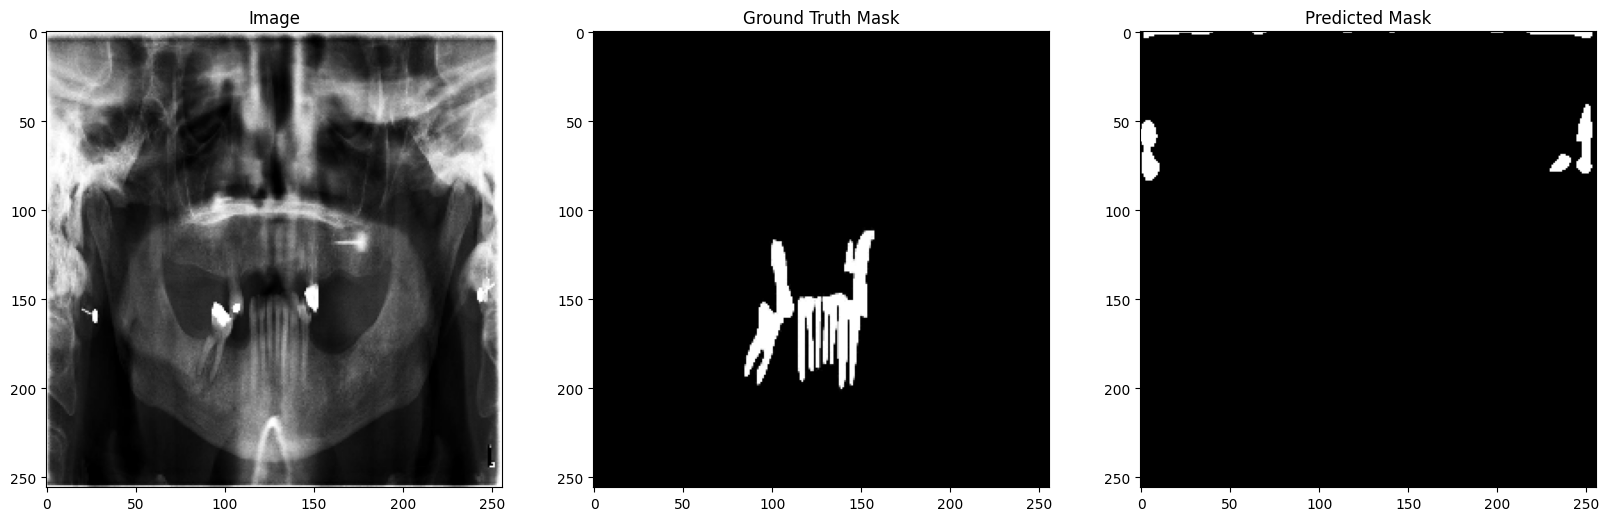

In [ ]:
import matplotlib.pyplot as plt

def visualize_prediction(images, masks, model, device, num_samples=5):
    model.eval()
    for i in range(num_samples):
        img = torch.from_numpy(images[i]).unsqueeze(0).unsqueeze(0).float().to(device)
        mask = torch.from_numpy(masks[i]).float()

        with torch.no_grad():
            pred = model(img)
        pred = (pred > 0.5).float()

        img = img.cpu().numpy()[0, 0, :, :]
        mask = mask.cpu().numpy()
        pred = pred.cpu().numpy()[0, 0, :, :]

        fig, axs = plt.subplots(1, 3, figsize=(20, 20))
        axs[0].imshow(img, cmap='gray')
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Ground Truth Mask')
        axs[2].imshow(pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = smp.Unet(encoder_name="efficientnet-b0", encoder_weights=None, in_channels=1, classes=1)
model.load_state_dict(torch.load("/content/drive/MyDrive/dissertation/models/model_transformer.pth"))
model.to(device)

images, masks = data_loader(path_to_images, path_to_masks, transform)

visualize_prediction(images, masks, model, device)
